In [ ]:
# from google.colab import drive

# drive.mount("/content/drive")

In [ ]:
# %cd "/content/drive/MyDrive/Act2.1"
# !dir

# LEGO Data Classification

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from matplotlib import pyplot as plt


base_dir = "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new_train_and_test"
train_dir = os.path.join(base_dir, "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new_train_and_test/train")
test_dir = os.path.join(base_dir, "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new_train_and_test/test")
validation_dir = os.path.join(base_dir, "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new_train_and_test/validation")

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=100,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
)

Found 1795 images belonging to 15 classes.
(25, 150, 150, 3)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1

<Figure size 640x480 with 0 Axes>

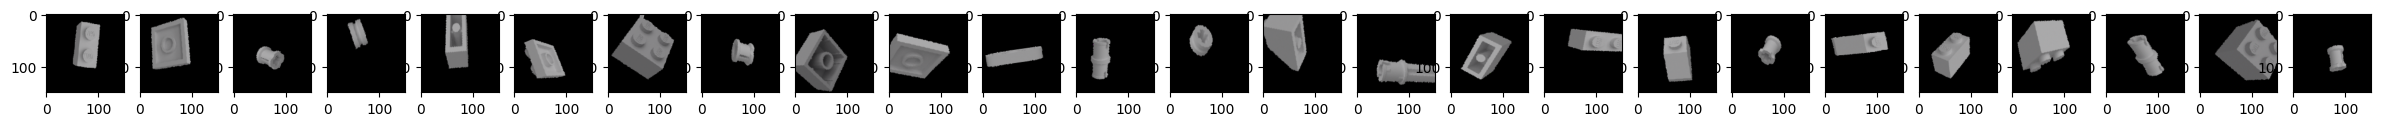

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode="categorical",
    save_to_dir=base_dir+'/_augmented/',
    save_prefix='aug',
    save_format='png'
)

images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode="categorical",
    save_to_dir=base_dir+'/_augmented/',
    save_prefix='aug',
    save_format='png'
)

Found 2092 images belonging to 15 classes.


In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode="categorical",
    save_to_dir=base_dir+'/_augmented/',
    save_prefix='aug',
    save_format='png'
)

Found 2092 images belonging to 15 classes.


## Creación del Modelo

In [ ]:
# Cargar el modelo base InceptionV3 pre-entrenado en ImageNet
base_model = InceptionV3(weights="imagenet", include_top=False)

# Añadir capas personalizadas para la clasificación de LEGO
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)

# Definir el modelo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar todas las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.2977 - loss: 5.4326
Epoch 1: saving model to saved-model-01-stage1.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 66s 794ms/step - accuracy: 0.2992 - loss: 5.4005 - val_accuracy: 0.5406 - val_loss: 1.5917
Epoch 2/5

Epoch 2: saving model to saved-model-02-stage1.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5306 - loss: 1.4624
Epoch 3: saving model to saved-model-03-stage1.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 58s 802ms/step - accuracy: 0.5312 - loss: 1.4606 - val_accuracy: 0.6836 - val_loss: 0.8284
Epoch 4/5

Epoch 4: saving model to saved-model-04-stage1.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.6338 - loss: 1.0486
Epoch 5: sa

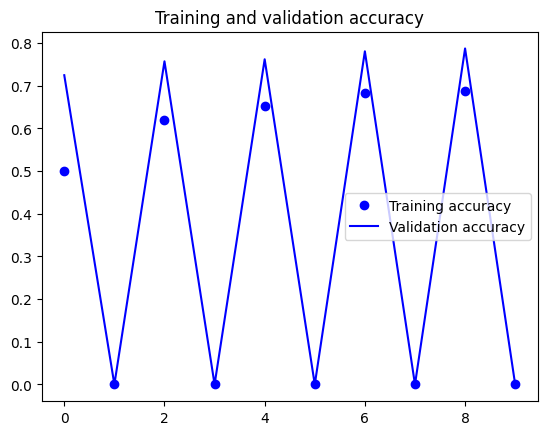

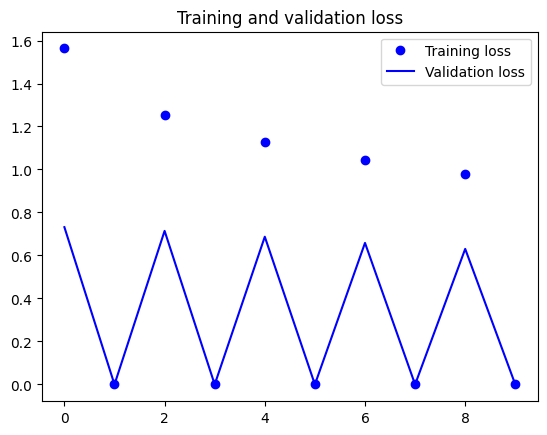

In [ ]:

# Callbacks para TensorBoard y ModelCheckpoint
tensorboard_callback = TensorBoard(log_dir="./logs_new/stage1")
checkpoint_callback = ModelCheckpoint(
    "saved-model-{epoch:02d}-stage1.keras",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    mode="max",
)

# Entrenar el modelo (Etapa 1)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[tensorboard_callback, checkpoint_callback],
)

# Descongelar las últimas capas del modelo base
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# Compilar el modelo nuevamente con un optimizador SGD
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Callbacks para TensorBoard y ModelCheckpoint
tensorboard_callback2 = TensorBoard(log_dir="./logs_new/stage2")
checkpoint_callback2 = ModelCheckpoint(
    "saved-model-{epoch:02d}-stage2.keras",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    mode="max",
)

# Entrenar el modelo nuevamente (Etapa 2)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[tensorboard_callback2, checkpoint_callback2],
)

# Evaluar el modelo en datos de prueba
evaluation = model.evaluate(test_generator, steps=len(test_generator))
print("Test Accuracy:", evaluation[1])

# Guardar el modelo entrenado
model.save("model_best_new_2.keras")

# Visualizar el proceso de entrenamiento
acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']  
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')  
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()